# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# I am checking the length of cities because I want to analyze at least 500 cities . . .
# so if the len of cities is less than 500 I will rerun this code 
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Before looping through the cities I am going to set up the base url
url = "http://api.openweathermap.org/data/2.5/weather?"
# Units = imperial gives the temperature in farenheit
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + cities[0]).json()

In [5]:
#Create empty lists and initialize variables
temp = []
humid = []
cloudiness =[]
ws = []
country = []
lat = []
lon = []
found_cities =[]

# Loop through the list of cities and perform a request for data on each
# Not every city is in the Open Weather API so I am preparing for the possibility of an error
for x in range(len(cities)):
    try:
        response = requests.get(query_url + cities[x]).json()
        found_cities.append(response['name'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        ws.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        print(f"FOUND IN API: City Number {x} Name {cities[x]}")
    except KeyError:
        print(f"NOT FOUND IN API: City Number {x} Name {cities[x]}")

FOUND IN API: City Number 0 Name san cristobal
FOUND IN API: City Number 1 Name lompoc
FOUND IN API: City Number 2 Name hobart
FOUND IN API: City Number 3 Name nikolskoye
FOUND IN API: City Number 4 Name chuy
NOT FOUND IN API: City Number 5 Name barentsburg
FOUND IN API: City Number 6 Name lufilufi
NOT FOUND IN API: City Number 7 Name khonuu
FOUND IN API: City Number 8 Name east london
FOUND IN API: City Number 9 Name turka
FOUND IN API: City Number 10 Name jamestown
FOUND IN API: City Number 11 Name new norfolk
FOUND IN API: City Number 12 Name westport
FOUND IN API: City Number 13 Name saint-philippe
FOUND IN API: City Number 14 Name mayo
FOUND IN API: City Number 15 Name yellowknife
FOUND IN API: City Number 16 Name nyagan
FOUND IN API: City Number 17 Name geraldton
FOUND IN API: City Number 18 Name mahebourg
NOT FOUND IN API: City Number 19 Name dzhusaly
FOUND IN API: City Number 20 Name vaini
FOUND IN API: City Number 21 Name ushuaia
FOUND IN API: City Number 22 Name qaanaaq
FOUND

FOUND IN API: City Number 187 Name saldanha
FOUND IN API: City Number 188 Name popondetta
FOUND IN API: City Number 189 Name atambua
FOUND IN API: City Number 190 Name liwale
FOUND IN API: City Number 191 Name nome
FOUND IN API: City Number 192 Name rawson
FOUND IN API: City Number 193 Name toamasina
FOUND IN API: City Number 194 Name puerto quijarro
FOUND IN API: City Number 195 Name pakdasht
FOUND IN API: City Number 196 Name chalon-sur-saone
FOUND IN API: City Number 197 Name mount isa
FOUND IN API: City Number 198 Name ribeira grande
FOUND IN API: City Number 199 Name hermanus
FOUND IN API: City Number 200 Name ponta do sol
FOUND IN API: City Number 201 Name cidreira
FOUND IN API: City Number 202 Name vredendal
FOUND IN API: City Number 203 Name sao felix do xingu
FOUND IN API: City Number 204 Name zhuhai
FOUND IN API: City Number 205 Name luderitz
FOUND IN API: City Number 206 Name dingle
FOUND IN API: City Number 207 Name husavik
FOUND IN API: City Number 208 Name mandurah
FOUND 

FOUND IN API: City Number 371 Name mutoko
FOUND IN API: City Number 372 Name damietta
FOUND IN API: City Number 373 Name shar
FOUND IN API: City Number 374 Name oranjestad
FOUND IN API: City Number 375 Name kapit
FOUND IN API: City Number 376 Name el carmen
FOUND IN API: City Number 377 Name maua
FOUND IN API: City Number 378 Name san quintin
FOUND IN API: City Number 379 Name masterton
FOUND IN API: City Number 380 Name beaumont
FOUND IN API: City Number 381 Name caravelas
FOUND IN API: City Number 382 Name isabela
FOUND IN API: City Number 383 Name half moon bay
FOUND IN API: City Number 384 Name port moresby
FOUND IN API: City Number 385 Name misratah
FOUND IN API: City Number 386 Name juneau
FOUND IN API: City Number 387 Name jalu
FOUND IN API: City Number 388 Name cayenne
FOUND IN API: City Number 389 Name nurota
FOUND IN API: City Number 390 Name nanortalik
FOUND IN API: City Number 391 Name chimbote
FOUND IN API: City Number 392 Name quelimane
FOUND IN API: City Number 393 Name 

FOUND IN API: City Number 556 Name isangel
FOUND IN API: City Number 557 Name kuznechnoye
FOUND IN API: City Number 558 Name chaumont
FOUND IN API: City Number 559 Name sorkjosen
FOUND IN API: City Number 560 Name tammisaari
FOUND IN API: City Number 561 Name ulladulla
FOUND IN API: City Number 562 Name dongying
FOUND IN API: City Number 563 Name rudsar
FOUND IN API: City Number 564 Name falun
FOUND IN API: City Number 565 Name port elizabeth
FOUND IN API: City Number 566 Name lata
FOUND IN API: City Number 567 Name marigot
FOUND IN API: City Number 568 Name zhangye
FOUND IN API: City Number 569 Name ygatimi
FOUND IN API: City Number 570 Name lianran
FOUND IN API: City Number 571 Name nouakchott
FOUND IN API: City Number 572 Name port shepstone
FOUND IN API: City Number 573 Name puerto narino
FOUND IN API: City Number 574 Name muros
FOUND IN API: City Number 575 Name aklavik
FOUND IN API: City Number 576 Name agirish
FOUND IN API: City Number 577 Name los llanos de aridane
FOUND IN API

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#This is to check that the data has at least 500 cities
print(len(found_cities))

# Create an index list
index_list = []
for x in range(len(found_cities)):
    index_list = []

577


In [7]:
# Create dataframe with the data read in from the API
city_weather_df = pd.DataFrame(index_list)
city_weather_df["City"] = found_cities
city_weather_df["Latitude"] = lat
city_weather_df["Longitude"] = lon
city_weather_df["Country"] = country
city_weather_df["Temperature (F)"] = temp
city_weather_df["Humidity %"] = humid
city_weather_df["Cloudiness %"] = cloudiness
city_weather_df["Wind Speed (mph)"] = ws

# Write dataframe to a csv file 
city_weather_df.to_csv("output_data/cities.csv", header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Remove all rows in dataframe where Humididty is over 100%
city_weather_df = city_weather_df.loc[city_weather_df["Humidity %"]<100,:]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

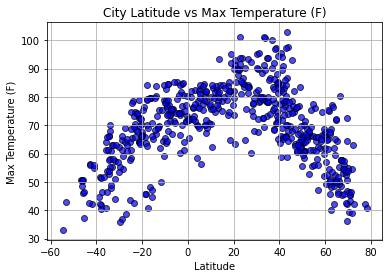

In [9]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Temperature (F)"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (F)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save as png
plt.savefig("output_data/Lat_vs_MaxTemp.png")
plt.show()

The scatterplot above shows the relationship between Maximum Temperature in farenheit and the Latitude of over 500 cities around the world. It shows the relationship that anyone would expect which parabolic relationship where cities closer to a latitude of 0 (the equator) are hotter and cities further from the equator are colder. 

## Latitude vs. Humidity Plot

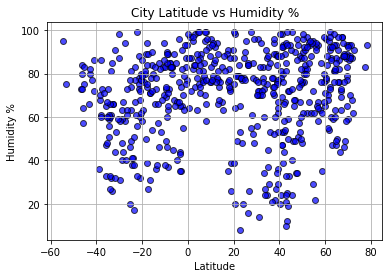

In [10]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity %"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity %")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

#Save as png
plt.savefig("output_data/Lat_vs_Humidity%.png")
plt.show()

The scatterplot above shows the relationship between latitude and humidity % of over 500 cities around the world. There is no relationship between the variables in the scatterplot so I can not conclude there is a relationship between City Latitude and Humidity %

## Latitude vs. Cloudiness Plot

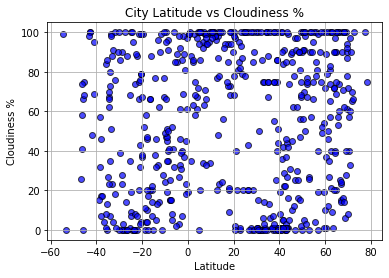

In [11]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Cloudiness %"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness %")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

#Save as png
plt.savefig("output_data/Lat_vs_Cloudiness%.png")
plt.show()

The Scatterplot above plots City Latitude vs Cloudiness % for over 500 cities around the world. There is no relationship shown in the scatterplot, so I can not conclude any relationship between City Latitude and Cloudiness %.

## Latitude vs. Wind Speed Plot

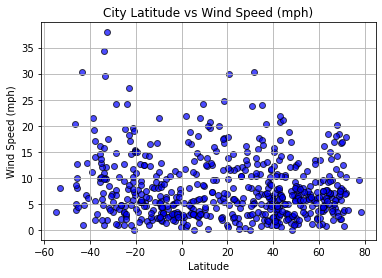

In [12]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind Speed (mph)"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save as png
plt.savefig("output_data/Lat_vs_WindSpeed(mph).png")
plt.show()

The Scatterplot above plots City Latitude vs Wind Speed (mph) for over 500 cities around the world. There is no relationship evident by looking at the scatterplot so I cannot conclude that there is a relationship between City Latitude and Wind Speed in mph. 

## Linear Regression

In [13]:
# First I have to spilt the 2 dataframes one for the Northern Hemisphere and one for the Southern Hemisphere
northern_df = city_weather_df.loc[city_weather_df["Latitude"]>=0,:]
southern_df = city_weather_df.loc[city_weather_df["Latitude"]<0,:]
print(len(city_weather_df))
print(len(northern_df))
print(len(southern_df))

574
378
196


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max Temperature (F) is -0.63


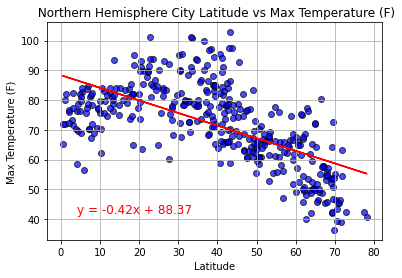

In [14]:
# Add the linear regression equation and line to plot
x_values = northern_df['Latitude']
y_values = northern_df['Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,42),fontsize=12,color="red")
plt.title(" Northern Hemisphere City Latitude vs Max Temperature (F)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Northern_Lat_vs_MaxTemp.png")

correlation = st.pearsonr(northern_df['Latitude'], northern_df['Temperature (F)'])
print(f"The correlation coefficient between Latitude and Max Temperature (F) is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max Temperature (F) is 0.71


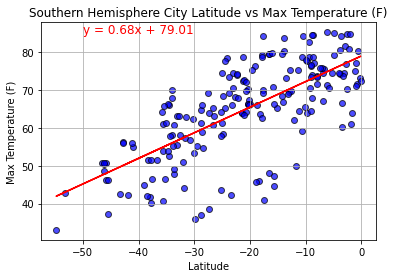

In [15]:
# Add the linear regression equation and line to plot
x_values = southern_df['Latitude']
y_values = southern_df['Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=12,color="red")

plt.title("Southern Hemisphere City Latitude vs Max Temperature (F)")

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Southern_Lat_vs_MaxTemp.png")

correlation = st.pearsonr(southern_df['Latitude'], southern_df['Temperature (F)'])

print(f"The correlation coefficient between Latitude and Max Temperature (F) is {round(correlation[0],2)}")

plt.show()

The Scatterplot for both the Northern Hemisphere and the Southern Hemishpere both show the same trend which is that as the Latitude of Cities gets closer to 0 (the equator) the temperature rises. This correlation is evident by the fact that the scatterplots have correlation coefficients of -0.63 and 0.71 which are both relatively strong correlations.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Humidity % is -0.02


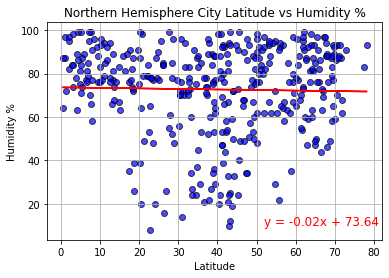

In [16]:
# Add the linear regression equation and line to plot
x_values = northern_df['Latitude']
y_values = northern_df['Humidity %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(52,10),fontsize=12,color="red")
plt.title("Northern Hemisphere City Latitude vs Humidity %")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Northern_Lat_vs_Humidity.png")

correlation = st.pearsonr(northern_df['Latitude'], northern_df['Humidity %'])
print(f"The correlation coefficient between Latitude and Humidity % is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Humidity % is 0.14


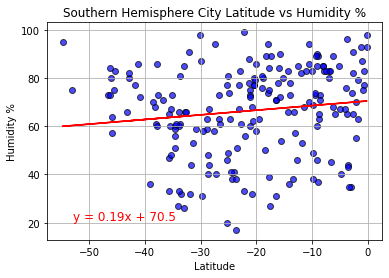

In [20]:
# Add the linear regression equation and line to plot
x_values = southern_df['Latitude']
y_values = southern_df['Humidity %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,21),fontsize=12,color="red")
plt.title("Southern Hemisphere City Latitude vs Humidity %")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Southern_Lat_vs_Humidity.png")

correlation = st.pearsonr(southern_df['Latitude'], southern_df['Humidity %'])
print(f"The correlation coefficient between Latitude and Humidity % is {round(correlation[0],2)}")

plt.show()

The Scatterplots for the Northern and the Southern Hemishperes both show that there is no correlation between a City's Latitude and the Humidity % of that city. This is evident by the fact that the correlation coefficients for the Northern and Southern Hemisphers for Latitude vs Humidity % are -0.02 and -0.14 respectively. Both these correlation coefficients indicate an extremely weak correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Cloudiness % is -0.13


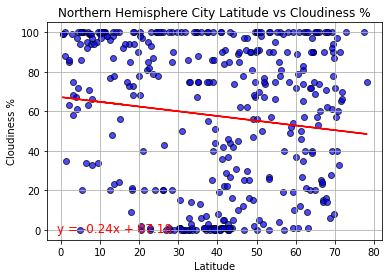

In [18]:
# Add the linear regression equation and line to plot
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-1,-1),fontsize=12,color="red")
plt.title("Northern Hemisphere City Latitude vs Cloudiness %")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Northern_Lat_vs_Cloudiness.png")

correlation = st.pearsonr(northern_df['Latitude'], northern_df['Cloudiness %'])
print(f"The correlation coefficient between Latitude and Cloudiness % is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Cloudiness % is -0.0


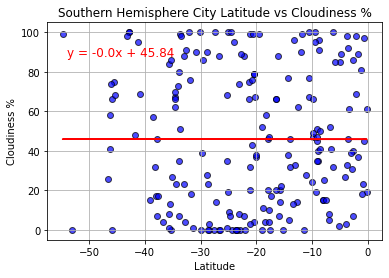

In [23]:
# Add the linear regression equation and line to plot
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54,88),fontsize=12,color="red")
plt.title("Southern Hemisphere City Latitude vs Cloudiness %")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Southern_Lat_vs_Cloudiness.png")

correlation = st.pearsonr(southern_df['Latitude'], southern_df['Cloudiness %'])
print(f"The correlation coefficient between Latitude and Cloudiness % is {round(correlation[0],2)}")

plt.show()

The Scatterplots for the Northern and the Southern Hemishperes both show that there is no correlation between a City's Latitude and the Cloudiness % in that city. This is evident by the fact that the correlation coefficients for the Northern and Southern Hemisphers for Latitude vs Cloudiness % are -0.13 and -0.0 which are both extremely work correlations.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Wind Speed is -0.09


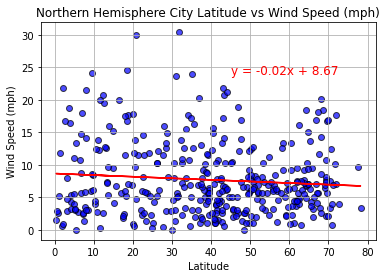

In [24]:
# Add the linear regression equation and line to plot
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,24),fontsize=12,color="red")
plt.title("Northern Hemisphere City Latitude vs Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Northern_Lat_vs_WindSpeed.png")

correlation = st.pearsonr(northern_df['Latitude'], northern_df['Wind Speed (mph)'])
print(f"The correlation coefficient between Latitude and Wind Speed is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Wind Speed is -0.29


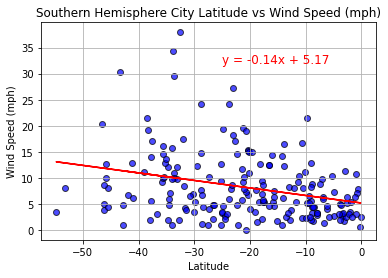

In [26]:
# Add the linear regression equation and line to plot
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,32),fontsize=12,color="red")
plt.title("Southern Hemisphere City Latitude vs Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Southern_Lat_vs_WindSpeed.png")

correlation = st.pearsonr(southern_df['Latitude'], southern_df['Wind Speed (mph)'])
print(f"The correlation coefficient between Latitude and Wind Speed is {round(correlation[0],2)}")

plt.show()

The Scatterplots for the Northern and the Southern Hemishperes both show that there is no correlation between a City's Latitude and the Wind Speed (mph) in that city. This is evident by the fact that the correlation coefficients for the Northern and Southern Hemispheres for Latitude vs Wind Speed (mph) are -0.09 and -0.29 which are both extremely weak correlations.